# 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
sur = pd.read_csv('survey.csv')
print(sur.shape)
display(sur.head())

(86, 3)


,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


In [3]:
#결측치 확인
sur.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
#결측치 제거
sur = sur.dropna(how="any")
sur.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### 불필요한 문자 제거(정규 표현식) : 문자열 처리하는 방법 중 하나로 특정 조건의 문자를 검색,치환 과정을 간편하게

In [5]:
sur.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


In [6]:
# 'AA역'에서 AA를 지워보자
sur['comment'] = sur['comment'].str.replace('AA','')
sur.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


In [7]:
# () 괄호 안에 1문자 이상 있으면 제거
sur['comment'] = sur['comment'].str.replace('\(.+?\)','')
sur.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


### 글자수를 히스토그램으로 나타내기


In [8]:
#새로운 열 'length' 생성
sur['length'] = sur['comment'].str.len()
sur.head()

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11


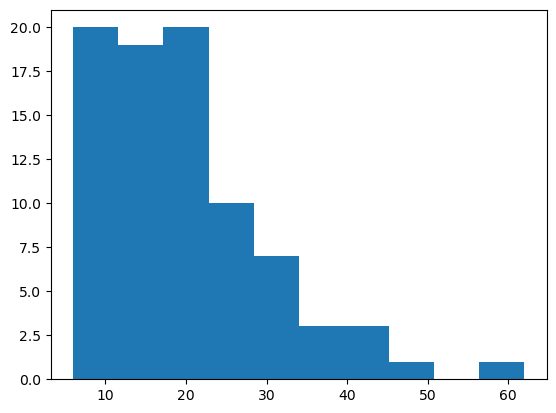

In [9]:
#이제length 열을 히스토그램
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(sur['length'])
plt.show()

### 문장 분해하기

In [11]:
from konlpy.tag import Twitter
twt = Twitter()
text = '형태소분석으로 문장을 분해해보자'
tagging = twt.pos(text)
tagging

[('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('으로', 'Josa'),
 ('문장', 'Noun'),
 ('을', 'Josa'),
 ('분해', 'Noun'),
 ('해보자', 'Verb')]

In [12]:
sy = []
for i in tagging:
    sy.append(i)
sy

[('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('으로', 'Josa'),
 ('문장', 'Noun'),
 ('을', 'Josa'),
 ('분해', 'Noun'),
 ('해보자', 'Verb')]

### 문장에서 '동사'와 '명사'만 추출

In [13]:
sy = []
for i,j in tagging:
    if j == 'Noun' or j == 'Verb':
        sy.append(i)
sy

['형태소', '분석', '문장', '분해', '해보자']

### 자주나오는 '명사' 찾기

In [14]:
sur.head()

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11


In [15]:
all_word = [] # 이 리스트에 명사를 담을 예정
for n in range(len(sur)):
    text = sur['comment'].iloc[n]
    words = twt.pos(text)
    
    for i, j in words:
        if j == 'Noun':
            all_word.append(i)
print(all_word)

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [17]:
#추출된 단어들을 잘 살펴보면 중복되는 단어가 몇개 있다. '역앞' 같은것도 여러본 나옴
#그래서 단어의 빈도수를 집계해서, 자주 등장하는 단어 TOP5뽑기

all_word_df = pd.DataFrame({'words': all_word, 'count': len(all_word)*[1]})
all_word_df = all_word_df.groupby('words').count()
all_word_df.sort_values('count', ascending=False).head()

,count
words,
더,14
수,7
장소,6
주차장,5
좀,5


### 관계없는 단어 제거하기

In [18]:
all_word = [] # 이 리스트에 명사 담을 예정
stop_words = ['더', '수', '좀']

for n in range(len(sur)):
    text = sur['comment'].iloc[n]
    words = twt.pos(text)
    
    for i, j in words:
        if j == 'Noun':
            if i not in stop_words: # stop_words 안의 단어라면 포함 안되게 하기
                all_word.append(i)
print(all_word)

['역앞', '젊은이', '운동', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '병원', '사이클링', '코스', '축제', '성대', '초등학교', '공원', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '밤길', '쓰레기', '처리', '영화관', '가로수', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '소방', '활동', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '지역', '자치', '단체', '지원', '자치', '단체', '활동', '안심', '살', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공', '주차장', '보행자', '용', '신호', '노인', '어린이', '생각', '설정', '급행', '시내', '버스', '노선'

In [19]:
all_word_df = pd.DataFrame({'words':all_word, 'count' : len(all_word)*[1]})
all_word_df = all_word_df.groupby('words').count()
all_word_df.sort_values('count', ascending=False).head()

,count
words,
장소,6
주차장,5
상가,5
역앞,5
공원,5
